# Importing Libraries and Data Loading

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-price-prediction/business.csv
/kaggle/input/flight-price-prediction/economy.csv
/kaggle/input/flight-price-prediction/Clean_Dataset.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/flight-price-prediction/Clean_Dataset.csv')

In [4]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [8]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


# Data Preprocessing

In [9]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
categorical_cols = []
numerical_cols = []
for col in df.columns:
    if df[col].dtype==object:
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

In [12]:
numerical_cols

['duration', 'days_left', 'price']

In [13]:
categorical_cols

['airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class']

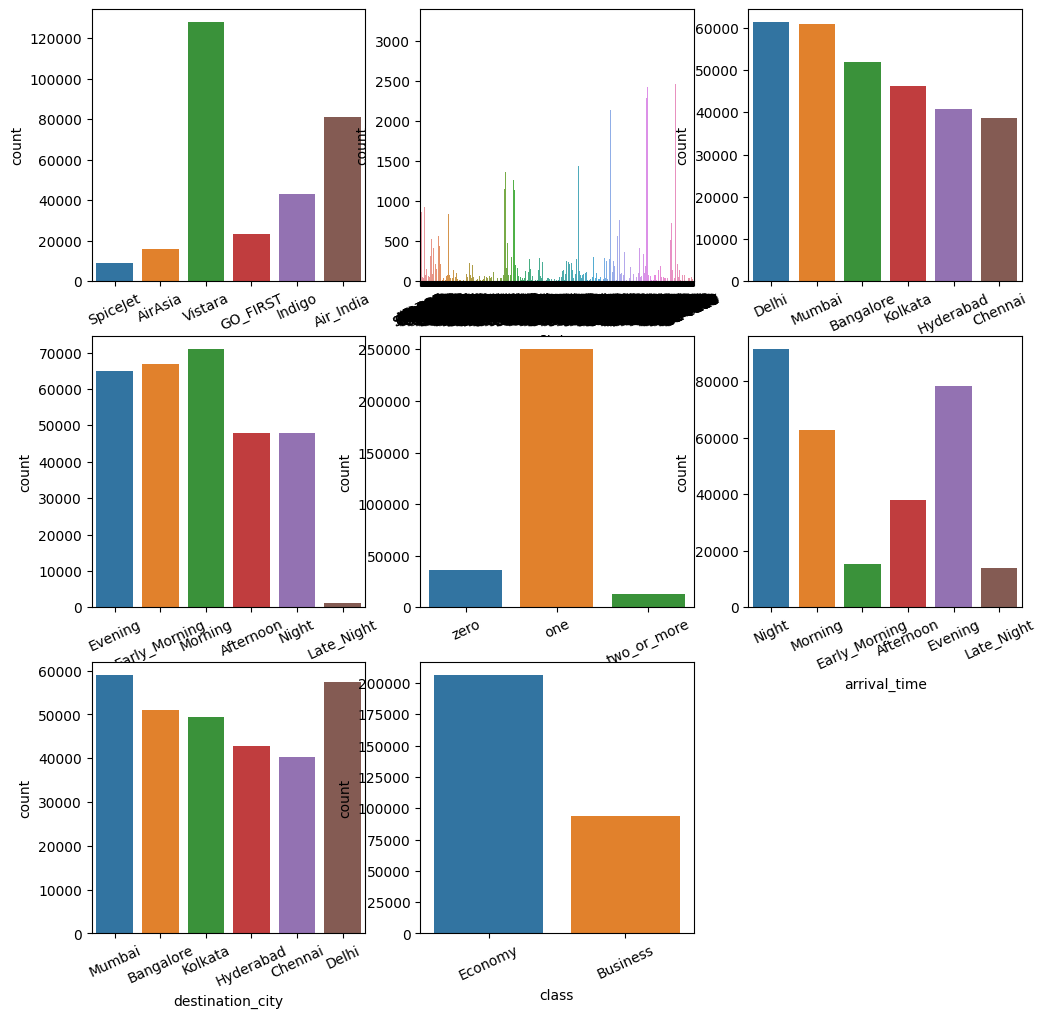

In [15]:
plt.figure(figsize=(12,12))
for i,col in enumerate(categorical_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(x=df[col])
    plt.xticks(rotation=25)
plt.show()

In [41]:
len(numerical_cols)

3

In [19]:
for col in categorical_cols:
    print(f"Unique values of {col}: {df[col].nunique()}")

Unique values of airline: 6
Unique values of flight: 1561
Unique values of source_city: 6
Unique values of departure_time: 6
Unique values of stops: 3
Unique values of arrival_time: 6
Unique values of destination_city: 6
Unique values of class: 2


In [20]:
df1 = df.copy()
df1

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
for col in categorical_cols:
    df1[col] = le.fit_transform(df1[col])

In [23]:
df1

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,10.08,49,69265
300149,5,1481,1,0,0,5,3,0,10.42,49,77105
300150,5,1486,1,1,0,5,3,0,13.83,49,79099
300151,5,1483,1,1,0,2,3,0,10.00,49,81585


In [24]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [25]:
df1[numerical_cols] = mms.fit_transform(df1[numerical_cols])
df1

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,0.027347,0.0,0.039749
1,4,1387,2,1,2,4,5,1,0.030612,0.0,0.039749
2,0,1213,2,1,2,1,5,1,0.027347,0.0,0.039773
3,5,1559,2,4,2,0,5,1,0.028980,0.0,0.039765
4,5,1549,2,4,2,4,5,1,0.030612,0.0,0.039765
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,0.188776,1.0,0.558844
300149,5,1481,1,0,0,5,3,0,0.195714,1.0,0.623124
300150,5,1486,1,1,0,5,3,0,0.265306,1.0,0.639473
300151,5,1483,1,1,0,2,3,0,0.187143,1.0,0.659856


<Axes: >

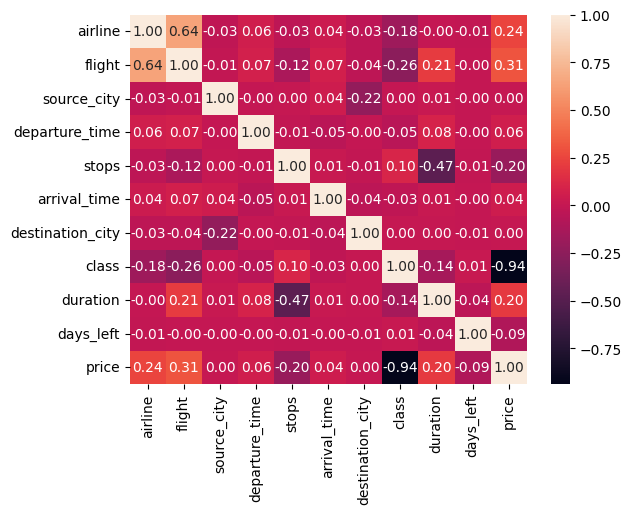

In [26]:
sns.heatmap(df1.corr(), annot=True, fmt='0.2f')

In [27]:
x = df1.drop('price', axis=1)
y = df1['price']

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [29]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((240122, 10), (60031, 10), (240122,), (60031,))

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [36]:
def model_fit_and_results(model, model_name, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    results = {
        'Model': model_name,
        'R2 Score': r2_score(y_test, y_pred),
        'Mean Squared Error': mean_squared_error(y_test, y_pred),
    }
    return results

In [38]:
models = [LinearRegression(),
          DecisionTreeRegressor(),
          RandomForestRegressor(),
          GradientBoostingRegressor(),
          MLPRegressor()]

In [39]:
models_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Multi-Layer Perceptron']

In [40]:
results_list=[]
for i in range(len(models)):
    result = model_fit_and_results(models[i], models_names[i], x_train, x_test, y_train, y_test)
    print(f"{models_names[i]}: {result}")
    results_list.append(result)

Linear Regression: {'Model': 'Linear Regression', 'R2 Score': 0.9052410391903879, 'Mean Squared Error': 0.003257123277669791}
Decision Tree: {'Model': 'Decision Tree', 'R2 Score': 0.9837882414743205, 'Mean Squared Error': 0.000557242245111197}
Random Forest: {'Model': 'Random Forest', 'R2 Score': 0.9899831682666043, 'Mean Squared Error': 0.0003443057577730973}
Gradient Boosting: {'Model': 'Gradient Boosting', 'R2 Score': 0.9577680156284237, 'Mean Squared Error': 0.0014516281962528117}
Multi-Layer Perceptron: {'Model': 'Multi-Layer Perceptron', 'R2 Score': -4.811594047962378, 'Mean Squared Error': 0.19976029804735215}


In [43]:
results_df = pd.DataFrame(results_list)
results_df

,Model,R2 Score,Mean Squared Error
0,Linear Regression,0.905241,0.003257
1,Decision Tree,0.983788,0.000557
2,Random Forest,0.989983,0.000344
3,Gradient Boosting,0.957768,0.001452
4,Multi-Layer Perceptron,-4.811594,0.199760
